# STARDIS

## Import Necessary Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tardis.io.atom_data.util import download_atom_data

from stardis.base import run_stardis

from astropy import units as u, constants as const

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

## Download Atomic Data

In [2]:
download_atom_data('kurucz_cd23_chianti_H_He')

Atomic Data kurucz_cd23_chianti_H_He already exists in /home/shield90/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5. Will not download - override with force_download=True.


### STARDIS contains a post-simulation function to broaden the spectrum appropriate for a v sin(i) given by the user. However, this is only physically valid when the spectrum broadened is given over a small range of frequencies or wavelengths, or is constant in velocity resolution across the spectrum. 

First, let's run a small, simple STARDIS simulation with a spectral resolution $R \sim 100000$

In [3]:
tracing_lambdas = np.arange(6540, 6590, 0.065) * u.Angstrom

sim = run_stardis('rotation_broadening_config.yml', tracing_lambdas)

/home/shield90/tardis_fork/tardis/tardis/plasma/properties/radiative_properties.py:90: RuntimeWarning: invalid value encountered in divide
  (g_lower * n_upper) / (g_upper * n_lower)
/home/shield90/tardis_fork/tardis/tardis/plasma/properties/radiative_properties.py:90: RuntimeWarning: invalid value encountered in divide
  (g_lower * n_upper) / (g_upper * n_lower)


Now, let's use the STARDIS broadening function and compare the outputs.

In [4]:
from stardis.radiation_field.opacities.opacities_solvers import rotation_broadening

Calculate the velocity resolution of the spectrum

In [5]:
const.c.to(u.km/u.s) / 100000

<Quantity 2.99792458 km / s>

And then let's apply the rotation broadening for our spectrum with a rotation velocity of 20 km/s.

In [6]:
wave, broadened_flux = rotation_broadening(3 * u.km/u.s, sim.lambdas, sim.spectrum_lambda, v_rot = 20 * u.km/u.s)

## Plot spectra

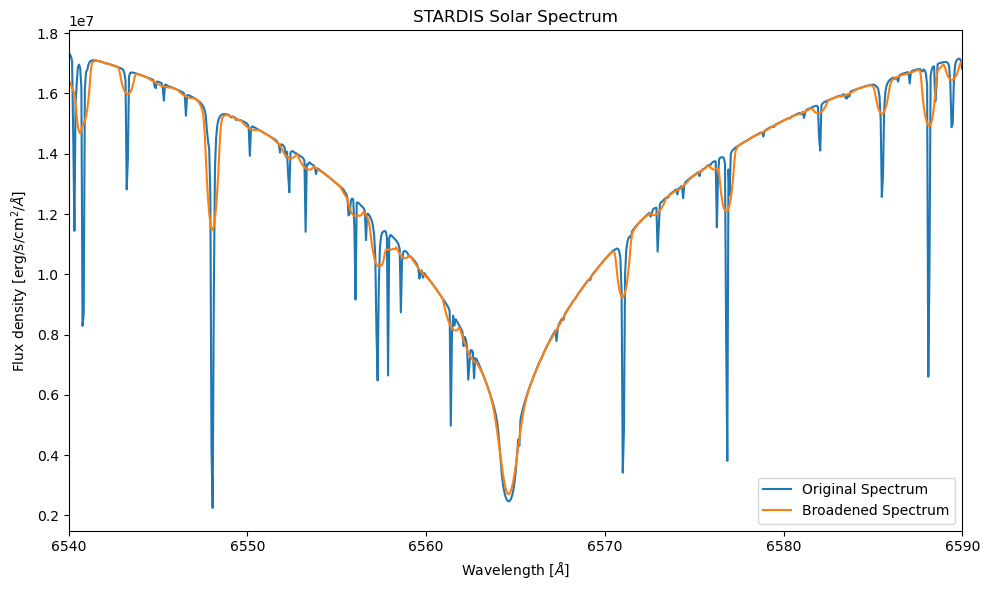

In [7]:
plt.figure(figsize=(10,6))
plt.plot(sim.lambdas, sim.spectrum_lambda, label='Original Spectrum')
plt.plot(wave, broadened_flux, label='Broadened Spectrum')

plt.xlim((6540,6590))
plt.title("STARDIS Solar Spectrum")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux density [erg/s/cm$^2$/$\AA$]")
plt.tight_layout()

plt.legend()
plt.show()